In [153]:
from sympy import linsolve, Matrix, S, Symbol, symbols, simplify, factor,  \
Eq, zeros, latex, linear_eq_to_matrix, solve
from IPython.display import Latex

# Занятие 5
# Алгебра

##  Прямые и плоскости в пространстве. Уравнения прямых и  плоскостей.
### Задание 1.
Определить, пересекаются ли плоскости (все сразу). Если пересекаются, найти точку пересечения.

Составить СЛАУ в виде списка уравнений, решить с помощью linsolve.

$-8x+5y-2z+28=0$

$-11x-10y-16z+71=0$

$-7x+3y+8z-27=0$.

In [155]:
x, y, z = symbols('x y z')
task1 = [-8*x + 5*y - 2*z + 28,
         -11*x - 10*y - 16*z + 71,
         -7*x + 3*y + 8*z - 27]

display(*linsolve(task1, x, y, z))

(1, -2, 5)

### Задание 2.
Найти точку пересечения прямой, проходящей через точки $A(-3,5,1)$ и $B(5,2,-3)$ и плоскости, в которой лежат точки
$K(4,3,0)$, $M(2,4,-2)$ и $N(-2,2,-1)$.

In [156]:
x, y, z, t = symbols('x y z t')
X = Matrix([x, y, z])
A = Matrix([-3, 5, 1])
B = Matrix([5, 2, -3])
# Уравнение прямой.
AB = (A + (B - A)*t).T
sys = [Eq(X[i], AB[i]) for i in range(3)]

# Добавляем в систему уравнение плоскости.
sys.append(Eq(Matrix([[x - 4, y - 3, z - 0],
                      [2 - 4, 4 - 3, -2 - 0],
                      [-2 - 4, 2 - 3, -1 - 0]]).det(), 0))

display(Latex(fr'\text{{Точка пересечения }}{latex(Matrix(*linsolve(sys, x, y, z, t))[:-1, :].T)}'))

<IPython.core.display.Latex object>

### Задание 3.
Составить параметрические уравнения прямой, являющейся линией пересечения плоскостей $𝑦+2𝑧−4=0$ и $4𝑥+3𝑦+2𝑧−4=0$.

Указание: составить СЛАУ из уравнений плоскостей, воспользоваться linsolve(), заменить переменную в полученном решении на параметр t и составить СЛАУ из параметрических уравнений.

In [157]:
# СЛАУ из уравнений плоскостей.
task3 = [Eq(y + 2*z - 4, 0),
         Eq(4*x + 3*y + 2*z - 4, 0)]

# Находим решение СЛАУ - это будут параметрические уравнения прямой.
AB = Matrix(*linsolve(task3, x, y, z).subs(z, t))

# Собираем уравнения в систему.
sys = []
for i in range(3):
  sys.append(Eq(X[i], AB[i]))

# Вывод уравнений.
display(Latex('Параметрические\ уравнения\ прямой:'))
display(*sys)

<IPython.core.display.Latex object>

Eq(x, t - 2)

Eq(y, 4 - 2*t)

Eq(z, t)

###  Задание 4.
Прямая задана параметрическими уравнениями:
$$
\left\{\begin{matrix}
x=2+5t\\
y=-1-2t\\
z=4-3t
\end{matrix}\right..
$$
Представить прямую в виде линии пересечения двух плоскостей, одна из которых проходит через начало координат, а вторая плоскость перпендикулярна первой плоскости. Вывести на экран уравнения плоскостей.

Указание: составить параметрические уравнения прямой в виде списка правых частей уравнений, затем по образцу Примера 5 составить уравнение плоскости, проходящей через начало координат (по трем точкам). Для составления второй плоскости заметим, что вектор нормали к первой плоскости и любой вектор прямой параллельны второй плоскости, поэтому можно применить формулу 4 уравнения плоскости.
Вектор нормали можно составить вручную, глядя на уравнение первой плоскости.

In [ ]:
first = Matrix([[x, y, z], [2, -1, 4], [5, -2, -3]])
display(Latex(fr'\text{{Уравнение первой плоскости: }}{latex(Eq(first.det(), 0))}'))

line_dot_1 = Matrix([2, -1, 4]) # Точка на прямой при t = 0
line_dot_2 = Matrix([7, -3, 1]) # Точка на прямой при t = 1
line = (line_dot_1 - line_dot_2).T

second = Matrix([[x-2, y+1, z-4], [11, 26, 1], line]).det()
display(Latex(fr'\text{{Уравнение второй плоскости: }}{latex(simplify(Eq(second, 0)))}'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Индивидуальное задание
Даны точки $A$, $B$, $C$, $M$, $K$ и $P$  в пространстве. Составить уравнение плоскостей $ABC$ и $MKP$, найти линию пересечения плоскостей или установить их параллельность.

Составить систему параметрических уравнений прямых $MK$ и $CN$, прямая $CN$ перпендикулярна плоскости $ABC$. Найти точку пересечения $MK$ и $CN$.

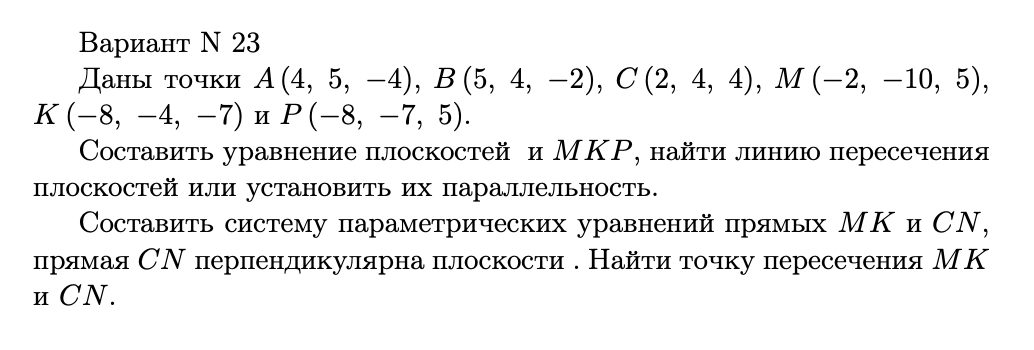

In [161]:
A = Matrix([4, 5, -4])
B = Matrix([5, 4, -2])
C = Matrix([2, 4, 4])

M = Matrix([-2, -10, 5])
K = Matrix([-8, -4, -7])
P = Matrix([-8, -7, 5])

X = [x, y, z]

def eq_plane(one, two, three):
  array = []
  for i in (X, two, three):
    array.append([i[0] - one[0], i[1] - one[1], i[2] - one[2]])
  return Matrix(array)

MKP = eq_plane(M, K, P)
ABC = eq_plane(A, B, C)

print("Плоскость ABC: ")
display(simplify(Eq(ABC.det(), 0)))
print("\nПлоскость MKP: ")
display(simplify(Eq(MKP.det(), 0)))

def is_parallel_or_intersect(plane1, plane2):
  left1, right1 = linear_eq_to_matrix(plane1.det(), x, y, z)
  left2, right2 = linear_eq_to_matrix(plane2.det(), x, y, z)
  if Matrix([left1, left2]).rank() == 1:
    display(Latex(fr'\text{{Плоскости параллельны.}}'))
  else:
    system = Matrix([plane1.det(), plane2.det()])
    display(Latex(fr'\text{{Точка пересечения }}{latex(Matrix(*linsolve(system, x, y, z))[:-1, :].T)}'))

is_parallel_or_intersect(ABC, MKP)

def input_line(AB):
  for i in range(3):
    display(Latex(f"""{X[i]} = {AB[i]}"""))

print(f"\nСистема параметрических уравнений прямой MK")
MK = M + (K - M) * t
input_line(MK)

# Прямая CN перпендикулярна ABC => CN - нормаль плоскости ABC
cn = Matrix([2, 4, 1])
print(f"\nСистема параметрических уравнений прямой CN")
s = Symbol('s')
CN = C + cn*s
input_line(CN)

answer = list(linsolve([Eq(MK[i], CN[i]) for i in range(3)], t, s))
point = Matrix(MK).T.subs(t, answer[0][0])
point = [Eq(X[i], point[i]) for i in range(3)]

display(Latex(f'Точка\ пересечения:\ {latex(point)}'))

Плоскость ABC: 


Eq(2*x + 4*y + z, 24)


Плоскость MKP: 


Eq(2*x + 4*y + z, -39)

<IPython.core.display.Latex object>


Система параметрических уравнений прямой MK


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


Система параметрических уравнений прямой CN


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>